# Sentiment Analysis in Python

<br>

**sentiment analysis** - the process of understanding the opinion of an author about a subject  

Elements of sentiment analysis:  

1. Opinion/emotion being expressed (how)
2. The subject (what)
3. The opinion holder (who)

Applications of sentiment analysis:  

* Social media monitoring
    * what and how are customers talking about a something
    * social media across may platforms (forums, blogs, news)
* Brand monitoring/Product analysitcs
* Customer Service
* Market Research

taking a look at a data set of IMDB reviews.....

In [2]:
import pandas as pd

imdb = pd.read_csv( 'IMDB_sample.csv' )
imdb.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [4]:
imdb.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

In [6]:
# as a percentage
imdb.label.value_counts() / len( imdb )

0    0.504199
1    0.495801
Name: label, dtype: float64

<br>

we see that the reviews data is relatively balanced

<br>

In [9]:
#how long is the longest review?
length_reviews = imdb.review.str.len()
print( type( length_reviews ) )

print( "max review length:", max( length_reviews ) )
print( "min review length:", min( length_reviews ) )

<class 'pandas.core.series.Series'>
max review length: 10321
min review length: 52


<br>

## Sentiment Analysis Types and Approaches

Levels of granularity:  

1. Document level
2. Sentence level
3. Aspect level

Types of Sentiment Analysis Algorithms  

* Rule/Lexicon based 
    - relies on manually crafted valence scores
    - Problem: different words might have different polarity in different contexts
    - Pro - can be quite fast
* Machine Learning 
    - relies on having labelled historical data
    - Problem - might take a while to train
    - Pro - machine learning models can be very powerful

<br>

In [11]:
text = 'Today was a good day'
from textblob import TextBlob

my_valence = TextBlob( text )
my_valence.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [12]:
two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'
# Create a textblob object  
blob_two_cities = TextBlob(two_cities)
# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


In [13]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."
# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)
# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


In [14]:
titanic = """Titanic directed by James Cameron presents a fictional love story on the historical setting 
of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and 
keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the 
love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady 
betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist 
on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes 
and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the 
audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern 
times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which 
has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration 
of the wreck on television and is flown to the boat where the search is being led from to tell of what she 
remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With 
this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the 
passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage 
across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but 
the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an 
engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. 
Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed 
of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on 
Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his 
thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the 
waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded 
at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut 
off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit 
the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of 
the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set 
off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted 
six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. 
The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their 
trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its 
own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were 
on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the 
crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was 
believed over that of second and third class passengers when authorities were trying to gain information of the 
sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of 
severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is 
very accurate in its portayal of the events and the times at which these events took place on the Titanic.
<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or 
as composite characters to represent possible characteristics and ideas of people on the ship. The core group of 
Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different 
groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; 
the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's 
officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned 
to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his 
status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only 
four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with 
his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized 
and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a 
language problem between the crew and many of the lower-class passengers from non-English speaking nations. In 
addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in 
their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. 
Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who 
was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest 
man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger 
wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of 
the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over 
four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were 
masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen 
is recreated perfectly with all of the machines reproduced to match those seen in old photographs. 
The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. 
The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten 
moving yet. Women during this time often married for financial security as Rose was considering doing and 
normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well 
to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted 
to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time 
but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of 
the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially 
by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled 
with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful 
cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable 
message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their 
demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. 
Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation 
on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced 
as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual 
Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not 
have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an 
underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one 
portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take 
whatever valuables they as portrayed in the film showing the general values of our time on this matter.
<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it 
took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created 
to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as 
far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an 
unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic 
to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during 
the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very 
beginning of the movie a septune recreation is used to recreate the scene when the actual people left the 
European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />
Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history 
novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. 
Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. 
If you like interesting characters that will give you an insight into the life of characters in the early 1900's 
and how they face disaster, then this movie definitely is for you.<br /><br />"""
blob_titanic = TextBlob(titanic)
# Print out the sentiment 
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


<br>

### Building a Word Cloud

size of the text  corresponds to the frequency of the word  
the more frequent the word is, the BIGGER and **bolder** it will appear 

* Pros  
    - can reveal the essential
    - provide an overal sense of the text
    - easy to grasp and engaging
* Cons
    - Sometimes confusing and not always informative
    - with larger bodies of text, requires more computation

<br>

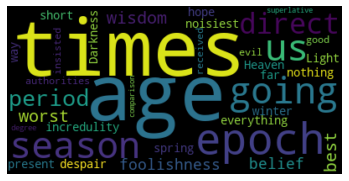

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud_two_cities = WordCloud().generate( two_cities )
plt.imshow( cloud_two_cities, interpolation='bilinear' )
plt.axis( 'off' )
plt.show()

In [24]:
?WordCloud

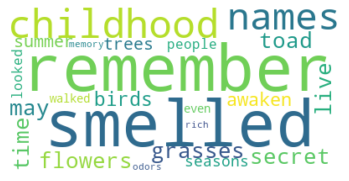

In [23]:
east_of_eden = """I remember my childhood names for grasses and secret flowers. 
I remember where a toad may live and what time the birds awaken in the summer—and 
what trees and seasons smelled like—how people looked and walked and smelled even. 
The memory of odors is very rich."""
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)
# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

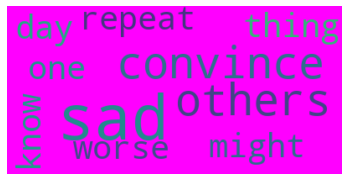

In [25]:
illuminated = """I am not sad, he would repeat to himself over and over, I am not sad. 
As if he might one day convince himself or convince others -- the only thing worse than being sad is 
for others to know that you are sad. I am not sad."""
# Generate the word cloud from the east_of_eden string
cloud_illuminated = WordCloud(background_color="magenta").generate(illuminated)
# Create a figure of the generated cloud
plt.imshow(cloud_illuminated, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

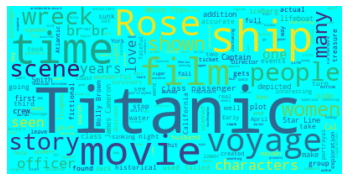

In [27]:
cloud_titanic = WordCloud(background_color="cyan").generate(titanic)
# Create a figure of the generated cloud
plt.imshow(cloud_titanic, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

<br>

## Bag-of-Words

**bag-of-words** - describes the occurance of words within a document or a collection of documents (corpus). builds a vocabulary of the words and a measure of their presense.  
is called a bag of words, because the process loses word order and grammar rules.

<br>

In [28]:
# take a look at the data set: Amazon reviews
arev = pd.read_csv( 'amazon_reviews_sample.csv' )
arev.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( max_features=1000 )
vect.fit( arev.review )
X = vect.transform( arev.review )

In [36]:
type( X )

scipy.sparse.csr.csr_matrix

In [37]:
# tranform the array
my_array = X.toarray()

X_df = pd.DataFrame( my_array, columns=vect.get_feature_names() )

X_df.head()

,10,100,12,15,1984,20,30,40,451,50,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,0


<br>

### Getting granular with n-grams

* **unigrams** - single tokens
* **bigrams** - pairs of tokens
* **trigrams** - triplets of tokens
* **n-grams** - sequences of n-tokens

What is the best 'n'?  

* Longer sequences of tokens:
    - results in more features
    - results in a higher precision with ML models
    - however, runs a rist of overfitting

Specifying vocabulary size:  

* **max_features** - include on the the top most frequent words in the vocabulary. if max_features = None, all words will be included  
* **max_df** - ignore terms with higher than specified frequency. if it is an interger value == absolute count. if it is a float == proportion. default = 1 == all words included
* **min_df** - ignore terms with lower than specified frequency. if it is an interger value == absolute count. if it is a float == proportion. default = 1 == all words included

<br>

In [42]:
# n-grams with the CountVectorizer

# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(1,2), min_df=50, max_df=1000)
vect.fit(arev.review)

# Transform the review column
X_review = vect.transform(arev.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   10  100  12  15  1984  20  2nd  30  40  451  ...  you will  you won  \
0   0    0   0   0     0   0    0   0   0    0  ...         0        0   
1   0    0   0   0     0   0    0   0   0    0  ...         0        0   
2   0    0   0   0     0   0    0   0   0    0  ...         0        0   
3   0    0   0   0     0   0    0   0   0    0  ...         0        0   
4   0    0   0   0     0   0    0   0   0    0  ...         0        0   

   you would  young  younger  your money  your own  your time  yourself  zero  
0          0      0        0           0         0          0         0     0  
1          0      0        0           0         0          0         0     0  
2          0      0        0           0         0          0         0     0  
3          0      0        0           0         0          0         0     0  
4          0      0        0           0         0          0         0     0  

[5 rows x 2449 columns]


In [41]:
arev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   score       10000 non-null  int64 
 2   review      10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


<br>

### Build New Features from Text

Goal: enrich the existing dataset with features related to the text column (capturing sentiment)  

ex:  

* number of tokens
* number of punctuation signs

<br>

In [45]:
from nltk import word_tokenize

word_tokenize( annak )

['Happy',
 'families',
 'are',
 'all',
 'alike',
 ';',
 'every',
 'unhappy',
 'family',
 'is',
 'unhappy',
 'in',
 'its',
 'own',
 'way']

In [46]:
word_tokens = [ word_tokenize( review ) for review in arev.review ]
print( type( word_tokens ) )

<class 'list'>


In [48]:
#how many tokens are in each list in the list of lists
len_tokens = [len( tokenlist ) for tokenlist in word_tokens ]
arev[ 'n_tokens' ] = len_tokens
arev.head()

,Unnamed: 0,score,review,n_tokens
0,0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,1,The best soundtrack ever to anything.: I'm re...,109
2,2,1,Amazing!: This soundtrack is my favorite musi...,165
3,3,1,Excellent Soundtrack: I truly like this sound...,145
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


<br>

### detecting language

<br>

In [51]:
from langdetect import detect_langs

foreign = """El señor y la señora Dursley, que vivían en el número 4 de Privet Drive,
estaban orgullosos de decir que eran muy normales, afortunadamente. Eran las
últimas personas que se esperaría encontrar relacionadas con algo extraño o
misterioso, porque no estaban para tales tonterías."""
detect_langs( foreign )

[es:0.9999970769700325]

In [53]:
# language of a column
languages = []
for row in range( len( arev ) ):
    languages.append( detect_langs( arev.iloc[ row,2 ] ) )

In [54]:
languages[0:20]

[[en:0.9999963872648088],
 [en:0.9999984467761495],
 [en:0.999997475112818],
 [en:0.9999967037440034],
 [en:0.9999965455695101],
 [en:0.9999974201519923],
 [en:0.999997485574486],
 [en:0.9999981412356485],
 [en:0.9999964803285647],
 [en:0.9999985364589521],
 [en:0.9999962386334128],
 [en:0.9999962869254398],
 [en:0.9999993504545284],
 [en:0.9999980653884382],
 [en:0.9999973667289386],
 [en:0.9999972110071678],
 [en:0.9999966039551466],
 [en:0.9999970403574923],
 [en:0.9999982400664471],
 [en:0.999996909111289]]

In [57]:
languages = [ str( lang ).split(':')[0][1:] for lang in languages ]

In [59]:
arev['language'] = languages
arev.head()

,Unnamed: 0,score,review,n_tokens,language
0,0,1,Stuning even for the non-gamer: This sound tr...,87,en
1,1,1,The best soundtrack ever to anything.: I'm re...,109,en
2,2,1,Amazing!: This soundtrack is my favorite musi...,165,en
3,3,1,Excellent Soundtrack: I truly like this sound...,145,en
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",109,en


In [61]:
set( languages )

{'de', 'en', 'es', 'fr', 'id', 'it'}